# Setting up notebook:

In [ ]:
# Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import plotly.express as px
import sys
sys.setrecursionlimit(2000)

# File with the cooridantes:

In [ ]:
# opening file:
df_original = pd.read_excel('/content/Base_de_datos_con_direcciones_limpias.xlsx')
df_original.columns

Index(['Unnamed: 0', 'Curso', 'ESTUDIANTE', 'DIRECCION', 'BARRIO', 'RUTA',
       'CIUDAD', 'Num_Ruta', 'Direccion_Clean', 'Direccion_final', 'Marker',
       'latitudes', 'longitudes', 'coordenadas'],
      dtype='object')

In [ ]:
df = df_original.copy()
not_found = df[df['latitudes'] == 'not found']
not_found = not_found.drop('Unnamed: 0', axis=1)
not_found

Curso                   ESTUDIANTE  ... longitudes                 coordenadas
1277   09H    ZAMBRANO PEÑA LAURA SOFIA  ...  not found  ('not found', 'not found')
1385   02A  AVILA PUENTES SERGIO ANDRES  ...  not found  ('not found', 'not found')
1401   04C         LOPEZ PEREZ ISABELLA  ...  not found  ('not found', 'not found')
1409   05H      RAMIREZ ABELLA GABRIELA  ...  not found  ('not found', 'not found')
1419   KIB        SALAZAR VELEZ MARIANA  ...  not found  ('not found', 'not found')

[5 rows x 13 columns]

In [ ]:
df = df_original.copy()
df = df[df['latitudes'] != 'not found'].reset_index()
df = df[df['RUTA'] < 77].reset_index()
df = df.drop(['level_0','index','Unnamed: 0'], axis = 1)
df

Curso  ...                       coordenadas
0      04B  ...           (4.724351, -74.1202114)
1      09D  ...          (4.7241476, -74.1191685)
2      06D  ...   (4.7239944, -74.12078439999999)
3      10B  ...          (4.7228366, -74.1209799)
4      05F  ...          (4.7228366, -74.1209799)
...    ...  ...                               ...
1222   05E  ...          (4.7544685, -74.1094986)
1223   05E  ...  (4.748611299999999, -74.1020803)
1224   04E  ...          (4.7544685, -74.1094986)
1225   01D  ...          (4.7561591, -74.1158813)
1226   09C  ...          (4.7529284, -74.1098712)

[1227 rows x 13 columns]

# Maps:

https://python-visualization.github.io/folium/plugins.html

In [ ]:
folium_map=folium.Map()
STS = [4.710664, -74.124992]
folium_map=folium.Map(location= STS, zoom_start=12)
my_coor = zip(df.latitudes, df.longitudes)
my_list_coor = list(my_coor)
hm_layer = HeatMap(my_list_coor)
folium_map=folium_map.add_child(hm_layer)
folium_map

In [ ]:
locations = df[['latitudes', 'longitudes']]
locationlist = locations.values.tolist()

In [ ]:
map2 = folium.Map(location=STS, zoom_start=12)
for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], tooltip=df['ESTUDIANTE'][point], popup=df['Num_Ruta'][point], radius = 1.5, color='blue', fill=False).add_to(map2)
map2

In [ ]:
map3 = folium.Map(location=STS, zoom_start=12)
folium.plugins.MarkerCluster(locations=locationlist, overlay=True, popups=df['ESTUDIANTE']).add_to(map3)
map3

In [ ]:
def mapa_de_ruta(ruta):
  temp_df = df[df['RUTA']== ruta].reset_index()
  temp_locations =  temp_df[['latitudes', 'longitudes']]
  temp_locationlist = temp_locations.values.tolist()
  avg_latitud = temp_df['latitudes'].mean()
  avg_longitud = temp_df['longitudes'].mean()
  avg_location = [avg_latitud, avg_longitud]
  map = folium.Map(location=avg_location, zoom_start=16)
  for point in range(0, len(temp_locationlist)):
    folium.Marker(temp_locationlist[point], popup=temp_df['ESTUDIANTE'][point]).add_to(map)
  return map

In [ ]:
mapa_de_ruta(5)

# Sectors:

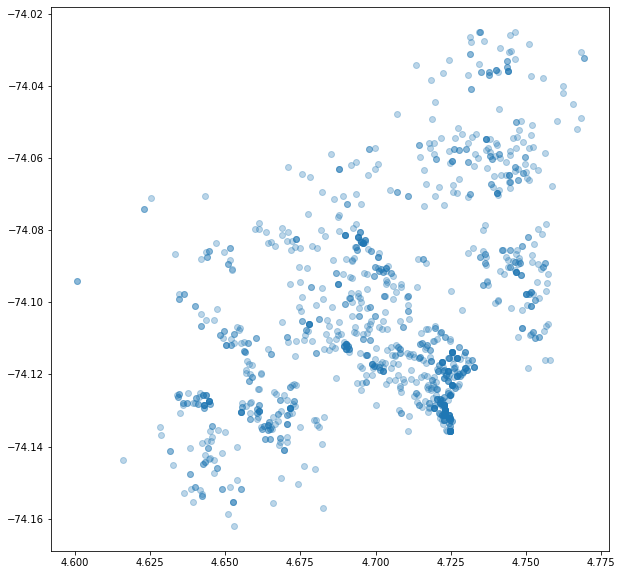

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(df['latitudes'], df['longitudes'], alpha=0.3)